### Problem Statement:
You are the data scientist at a medical research facility. The facility wants you to analyze the data to generate insights and build a machine learning model to classify if the given data of a patient should tell
if the patient is at the risk of a heart attack.

### Domain:
Healthcare

### Tasks To Be Performed:
- Data Analysis
- Data Visualization
- Logistic Regression
- Decision Tree
- Random Forest
- Select the best model



#### Description of the Dataset
The Dataset contains 303 rows and 14 columns :
1. age              : The age of the patient.
2. sex              : The gender of the patient.
3. chest pain              : Chest pain type.
4. trestbps         : Resting blood pressure.
5. chol             : Serum cholesterol level (in mg/dl). Higher levels may indicate increased risk.
6. fbs              : Fasting blood sugar level. It’s typically binary:
7. restecg          : Resting electrocardiographic results.
8. thalach          : Maximum heart rate achieved during exercise.
9. exang            : Exercise induced angina. It is binary:
10. oldpeak         : Depression induced by exercise relative to rest.
11. slope           : Slope of the peak exercise ST segment.
12. ca              : Number of major vessels colored by fluoroscopy.
13. Thalassemia     : This is categorical and might include:
14. heart disease   : The outcome variable indicating the presence or absence of heart disease.

In [2]:
# importing libraries and loading the datasets

import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Heart_disease.csv')

In [3]:
data.head()

,age,sex,Chest pain,trestbps(mm/Hg),chol(mm/dl),fbs(mg/dl),restecg,thalach,exang,oldpeak,slope,ca,Thalassemia,Heart Disease
0,63,M,Asymptomatic,145,233,> 120 mg/dl,Normal,150,No,2.3,Upsloping,0,Fixed defect,Present
1,37,M,Non-anginal pain,130,250,≤ 120 mg/dl,ST-T Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Present
2,41,F,Atypical angina,130,204,≤ 120 mg/dl,Normal,172,No,1.4,Downsloping,0,Reversible defect,Present
3,56,M,Atypical angina,120,236,≤ 120 mg/dl,ST-T Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Present
4,57,F,Typical angina,120,354,≤ 120 mg/dl,ST-T Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Present


In [4]:
# EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    int64  
 1   sex              303 non-null    object 
 2   Chest pain       303 non-null    object 
 3   trestbps(mm/Hg)  303 non-null    int64  
 4   chol(mm/dl)      303 non-null    int64  
 5   fbs(mg/dl)       303 non-null    object 
 6   restecg          303 non-null    object 
 7   thalach          303 non-null    int64  
 8   exang            303 non-null    object 
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    object 
 11  ca               303 non-null    int64  
 12  Thalassemia      303 non-null    object 
 13  Heart Disease    303 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 33.3+ KB


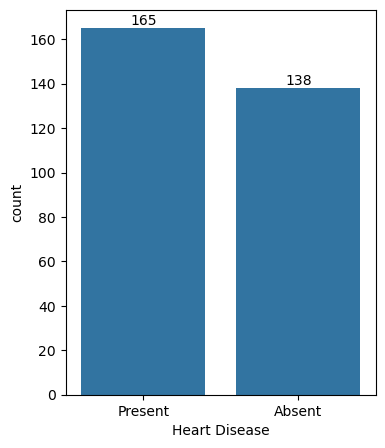

In [6]:
# Visualizing the number of patients having a heart disease and not having a heart disease

plt.figure(figsize = (4,5))
ax = sns.countplot(x = data['Heart Disease'])
for i in ax.containers:
    ax.bar_label(i)

#### 54% of People having heart disease

sex
M    93
F    72
Name: count, dtype: int64


<Axes: xlabel='sex'>

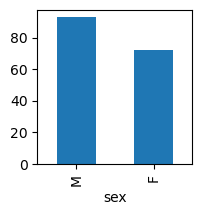

In [10]:
# Heart disease by gender:
print(data[(data['Heart Disease'] == 'Present')]['sex'].value_counts())
data[(data['Heart Disease'] == 'Present')]['sex'].value_counts().plot(kind = 'bar', figsize = (2,2))

#### Out of 165 peoples 93 are males and 72 are females

In [44]:
# Making another data of(heart disease = Present) to analyse with age 

data_yes = data[(data['Heart Disease'] == 'Present')]

In [13]:
# Age wise Analysis

filter_data = data.groupby('age')['Heart Disease'].count().sort_values(ascending = False).reset_index()

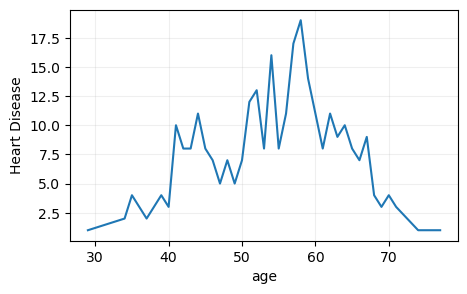

In [15]:
plt.figure(figsize = (5,3))
sns.lineplot(x = filter_data['age'] , y  = filter_data['Heart Disease'] )
plt.grid(True, alpha = .2)

In [80]:
age_group_50to60 = data[(data['age'] >= 50) & (data['age'] <= 60)]['Heart Disease'].count()

total_count = 165

(age_group_50to60/total_count)*100


82.42424242424242

#### At the age of 50 to 60 heart disease having more around 82% of Total count

Chest pain
Non-anginal pain    69
Atypical angina     41
Typical angina      39
Asymptomatic        16
Name: count, dtype: int64


Text(0.5, 0, 'counts')

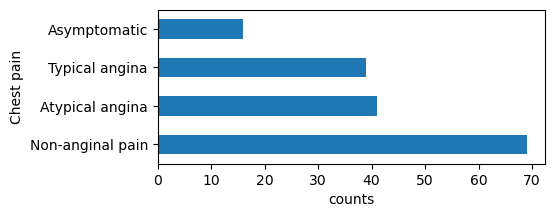

In [18]:
# heart disease according to the chest pain

print(data[(data['Heart Disease'] == 'Present')]['Chest pain'].value_counts())
data[(data['Heart Disease'] == 'Present')]['Chest pain'].value_counts().plot(kind = 'barh' , figsize = (5,2))
plt.xlabel('counts')


#### The patient having Non-anginal pain are more counts around 41%

restecg
ST-T Abnormality    96
Normal              68
LV Hypertrophy       1
Name: count, dtype: int64


Text(0.5, 0, 'counts')

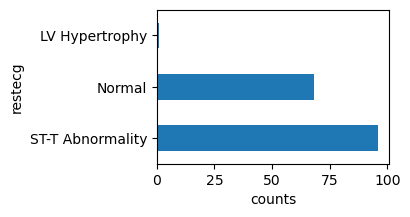

In [20]:

print(data[(data['Heart Disease'] == 'Present')]['restecg'].value_counts())
data[(data['Heart Disease'] == 'Present')]['restecg'].value_counts().plot(kind = 'barh', figsize = (3,2))
plt.xlabel('counts')


#### 58% of patient who have heart disease have  ST-T ABNORMALITY Chest pain while only one patient wo have heart disease having LV-Hypertrophy 

<Axes: xlabel='age', ylabel='chol(mm/dl)'>

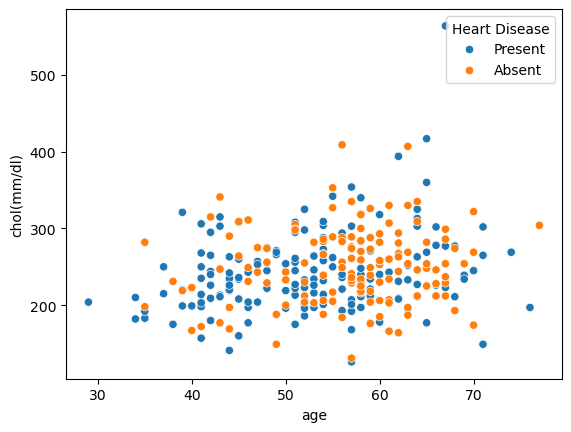

In [106]:
# Heart disease by cholesterol level and age
sns.scatterplot(x = data['age'] , y = data['chol(mm/dl)'], hue = data['Heart Disease'])

#### we can not say the person who have heart disease are having high or low cholesterol level

fbs(mg/dl)
≤ 120 mg/dl    142
> 120 mg/dl     23
Name: count, dtype: int64


<Axes: ylabel='count'>

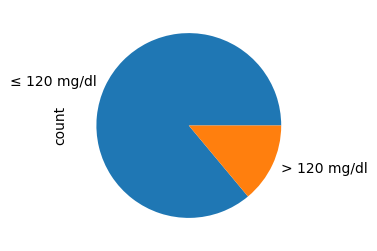

In [22]:
print(data[(data['Heart Disease'] == 'Present')]['fbs(mg/dl)'].value_counts())
data[(data['Heart Disease'] == 'Present')]['fbs(mg/dl)'].value_counts().plot(kind = 'pie', figsize=(3,3))

#### Around 86% of patient having Heart disease are having <= 120 mg/dl of Fasting blood sugar level

### Insights summary :
- 54% of People having heart disease
- Out of 165 peoples who having heart disease are 93 are males and 72 are females.
- At the age of 50 to 60 heart disease having more around 82% of Total count
- The patient having Non-anginal pain are more counts around 41%
- 58% of patient who have heart disease have ST-T ABNORMALITY Chest pain while only one patient wo have heart disease having LV-Hypertrophy
- we can not say the person who have heart disease are having high or low cholesterol level
- Around 86% of patient having Heart disease are having <= 120 mg/dl of Fasting blood sugar level

### Now we can move on to the model building part 

In [117]:
# Labeling the Categorical data to get important features that are impacting presence or abssence of heart disease

# importing libraries 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = le.fit_transform(data[i])
        mapping = dict(zip(le.classes_,le.transform(le.classes_)))
        print(mapping)
        print('_____________________________________________________________________________________')

{'F': 0, 'M': 1}
_____________________________________________________________________________________
{'Asymptomatic': 0, 'Atypical angina': 1, 'Non-anginal pain': 2, 'Typical angina': 3}
_____________________________________________________________________________________
{'> 120 mg/dl': 0, '≤ 120 mg/dl': 1}
_____________________________________________________________________________________
{'LV Hypertrophy': 0, 'Normal': 1, 'ST-T Abnormality': 2}
_____________________________________________________________________________________
{'No': 0, 'Yes': 1}
_____________________________________________________________________________________
{'Downsloping': 0, 'Flat': 1, 'Upsloping': 2}
_____________________________________________________________________________________
{'Fixed defect': 0, 'Normal': 1, 'Reversible defect': 2, 'Unknown': 3}
_____________________________________________________________________________________
{'Absent': 0, 'Present': 1}
___________________________________

In [133]:
# Feature Engineering: 
# Finding correlation between target and independent variables

for i in data.columns:
    print(i , "________" , data['Heart Disease'].corr(data[i]))

age ________ -0.22543871587483727
sex ________ -0.28093657550176654
Chest pain ________ -0.41252221856297244
trestbps(mm/Hg) ________ -0.14493112849775144
chol(mm/dl) ________ -0.08523910513756902
fbs(mg/dl) ________ 0.028045760272712755
restecg ________ 0.18163262539991418
thalach ________ 0.42174093381067435
exang ________ -0.4367570833533018
oldpeak ________ -0.4306960016873683
slope ________ -0.3458770782417253
ca ________ -0.3917239923512519
Thalassemia ________ -0.2476091566159637
Heart Disease ________ 1.0


#### This method is not usefull for this type of data sets we have to move for RFE (recursive Feature elemination)

In [137]:
# importing the libraries 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe = RFE(LogisticRegression())

In [140]:
# splitting the dataset 
X = data.drop(columns = ['Heart Disease'])
y = data['Heart Disease']

In [142]:
rfe.fit(X,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RFE(estimator=LogisticRegression())

In [146]:
rfe.ranking_

array([7, 1, 1, 6, 8, 4, 1, 5, 1, 3, 1, 1, 2])

In [152]:
important_cols = X.columns[rfe.get_support()]

In [153]:
important_cols

Index(['sex', 'Chest pain', 'restecg', 'exang', 'slope', 'ca'], dtype='object')

##### According to the RFE technique we now have out important columns :

'sex', 'Chest pain', 'restecg', 'exang', 'slope', 'ca'


In [156]:
# moving to the model building

In [157]:
X = X[important_cols]

In [158]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: Heart Disease, Length: 303, dtype: int32

In [159]:
# Splitting the Datasets into train and test 

# importing the libraries:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = .8, random_state = 0)

In [161]:
# Model Training
model = LogisticRegression()
model.fit(X_train ,y_train)

LogisticRegression()

In [168]:
# Model Testing 
from sklearn.metrics import *

prediction = model.predict(X_test)
print(accuracy_score(y_test ,prediction))
print()
print(confusion_matrix(y_test,prediction))



0.7868852459016393

[[19  8]
 [ 5 29]]


#### Accuracy Score is 78% which is good but need to move with DecisionTreeClassifier

In [170]:
# selection important features according to the decision tree

from sklearn.tree import DecisionTreeClassifier
rfe = RFE(DecisionTreeClassifier())

In [171]:
# splitting the dataset 
X = data.drop(columns = ['Heart Disease'])
y = data['Heart Disease']

In [172]:
rfe.fit(X,y)

RFE(estimator=DecisionTreeClassifier())

In [173]:
important_cols2 = X.columns[rfe.get_support()]

In [174]:
important_cols2

Index(['age', 'Chest pain', 'thalach', 'oldpeak', 'ca', 'Thalassemia'], dtype='object')

In [185]:
# model_building 
X = X[important_cols2]

In [189]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = .8, random_state = 10)

In [190]:
model2 = DecisionTreeClassifier()
model2.fit(X_train ,y_train)

DecisionTreeClassifier()

In [191]:
prediction2 = model2.predict(X_test)
print(accuracy_score(y_test ,prediction2))
print()
print(confusion_matrix(y_test,prediction2))


0.819672131147541

[[29  6]
 [ 5 21]]


#### We got 81% of accuracy in DecisionTreeClassifer model

#### now moving to the Random Forest model

In [192]:
from sklearn.ensemble import RandomForestClassifier
rfe = RFE(RandomForestClassifier())

In [193]:
# splitting the dataset 
X = data.drop(columns = ['Heart Disease'])
y = data['Heart Disease']

In [194]:
rfe.fit(X,y)

RFE(estimator=RandomForestClassifier())

In [195]:
important_cols3 = X.columns[rfe.get_support()]

In [230]:
important_cols3

Index(['age', 'Chest pain', 'thalach', 'oldpeak', 'ca', 'Thalassemia'], dtype='object')

In [231]:
# model_building 
X = X[important_cols3]

In [232]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = .8, random_state = 10)

In [237]:
model3 = RandomForestClassifier(n_estimators=20)
model3.fit(X_train ,y_train)

RandomForestClassifier(n_estimators=20)

In [238]:
prediction3 = model3.predict(X_test)
print(accuracy_score(y_test ,prediction3))
print()
print(confusion_matrix(y_test,prediction3))


0.8360655737704918

[[29  6]
 [ 4 22]]


#### We Got 83% accuracy in Random Forest Model 

## WE have Reached To the conclusion that for predicting the Heart Disease Random Forest is the Best Model.